<a href="https://colab.research.google.com/github/u56237z/ml-tf/blob/main/rnn_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json

f = open("/content/drive/My Drive/Colab Notebooks/dpc-covid19-ita-andamento-nazionale.json")

j = json.load(f)

In [3]:
dec = []

for i in j: dec.append(i['deceduti'])

In [4]:
import tensorflow as tf
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

sc = MinMaxScaler(feature_range=(0,1))

tf.random.set_seed(42)

In [5]:
x_set_max = len(j)
x_trn_max = int(x_set_max*0.8)

X_seq = sc.fit_transform(np.reshape(dec,(-1,1)))

X_set = []
y_set = []

for i in range(20,x_set_max):
  X_set.append(X_seq[i-20:i,0])
  y_set.append(X_seq[i,0])

X_train = np.array(X_set[:x_trn_max])
y_train = np.array(y_set[:x_trn_max])

X_test = np.array(X_set[x_trn_max:])
y_test = np.array(y_set[x_trn_max:])

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(90,dropout=0.2,return_sequences=True,input_shape=[20,1]),
  tf.keras.layers.LSTM(60,dropout=0.2,return_sequences=True),
  tf.keras.layers.LSTM(50,dropout=0.2),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mean_squared_error
)

history = model.fit(X_train,y_train,epochs=800,verbose=0)

In [7]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 12ms/step - loss: 0.0228


0.022794552147388458

In [8]:
y_pred = model.predict(X_test)

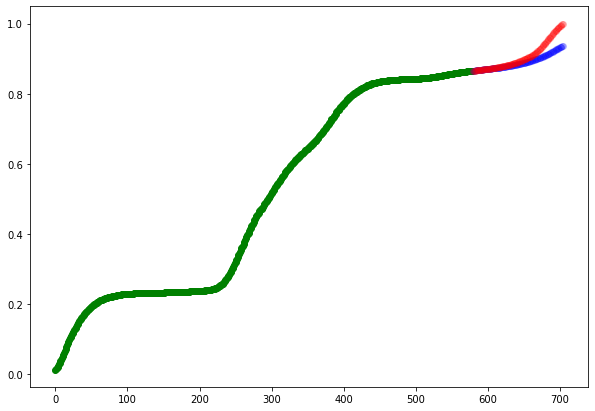

In [9]:
f = plt.figure(figsize=(22,7))

f1 = f.add_subplot(121)

f1.scatter([x for x in range(0,x_trn_max)],y_train,c="g",label="train")
f1.scatter([x+x_trn_max+1 for x in range(0,x_set_max-x_trn_max-20)],[y-(y_pred[0]-y_test[0]) for y in y_pred],c="b",label="pred",alpha=0.2)
f1.scatter([x+x_trn_max+1 for x in range(0,x_set_max-x_trn_max-20)],y_test,c="r",label="actual",alpha=0.2)